In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import sklearn

In [90]:
with sqlite3.connect("../laliga.sqlite") as con:
    df = pd.read_sql("""SELECT * FROM Matches""", con = con)

In [91]:
df_clean = df.dropna(subset = ["score"]).copy()
df_clean

,season,division,matchday,date,time,home_team,away_team,score
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2
...,...,...,...,...,...,...,...,...
48345,2021-2022,2,3,8/28/21,10:00 PM,Ponferradina,Girona,2:1
48346,2021-2022,2,3,8/29/21,5:00 PM,SD Amorebieta,UD Almería,2:1
48347,2021-2022,2,3,8/29/21,7:30 PM,CD Lugo,Real Valladolid,0:2
48348,2021-2022,2,3,8/29/21,7:30 PM,Real Sociedad B,CF Fuenlabrada,0:0


In [92]:
df_clean[['score_home', 'score_visitor']] = df_clean['score'].str.split(':', expand=True)
df_clean['score_home'] = pd.to_numeric(df_clean['score_home']).astype(int)
df_clean['score_visitor'] = pd.to_numeric(df_clean['score_visitor']).astype(int)
df_clean['goal_difference'] = df_clean['score_home'] - df_clean['score_visitor'].astype(int)
df_clean['result'] = "None"
df_clean.loc[df_clean['score_home'] > df_clean['score_visitor'], 'result'] = '1'
df_clean.loc[df_clean['score_home'] < df_clean['score_visitor'], 'result'] = '2'
df_clean.loc[df_clean['score_home'] == df_clean['score_visitor'], 'result'] = 'X'
df_clean[['start_year', 'end_year']] = df_clean['season'].str.split('-', expand=True)
df_clean['end_year'] = pd.to_numeric(df_clean['end_year']).astype(int)
df_clean = df_clean[df_clean['season'] != '2021-2022']
df_clean

,season,division,matchday,date,time,home_team,away_team,score,score_home,score_visitor,goal_difference,result,start_year,end_year
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3,2,3,-1,2,1928,1929
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2,3,2,1,1,1928,1929
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0,5,0,5,1,1928,1929
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1,1,1,0,X,1928,1929
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2,0,2,-2,2,1928,1929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47933,2020-2021,2,42,5/30/21,9:00 PM,CD Mirandés,CE Sabadell,0:2,0,2,-2,2,2020,2021
47934,2020-2021,2,42,5/30/21,9:00 PM,Ponferradina,RCD Mallorca,2:2,2,2,0,X,2020,2021
47935,2020-2021,2,42,5/30/21,9:00 PM,Rayo Vallecano,CD Lugo,0:1,0,1,-1,2,2020,2021
47936,2020-2021,2,42,5/30/21,9:00 PM,Real Zaragoza,CD Leganés,0:5,0,5,-5,2,2020,2021


In [93]:
#get ranking same way we did it in number 7 of the assignment
df_ex7 = df_clean.copy()
#this season was incomplete
df_ex7 = df_ex7[df_ex7['season'] != '2021-2022']
df_ex7['goal_difference_home'] = df_ex7['score_home'] - df_ex7['score_visitor']
df_ex7['goal_difference_away'] = df_ex7['score_visitor'] - df_ex7['score_home']
df_ex7_home = df_ex7[['season', 'division', 'home_team', 'score_home', 'score_visitor', 'result', 'goal_difference_home']]
df_ex7_away = df_ex7[['season', 'division', 'away_team', 'score_home', 'score_visitor', 'result', 'goal_difference_away']]
#default value
df_ex7_home['rank_points'] = 1
df_ex7_home.loc[df_ex7_home['result'] == '1', 'rank_points'] = 3
df_ex7_home.loc[df_ex7_home['result'] == '2', 'rank_points'] = 0

#default value
df_ex7_away['rank_points'] = 1 
df_ex7_away.loc[df_ex7_away['result'] == '1', 'rank_points'] = 0
df_ex7_away.loc[df_ex7_away['result'] == '2', 'rank_points'] = 3

df_ex7_home['goals_conceded'] = df_ex7_home['score_visitor']
df_ex7_home['goals_scored'] = df_ex7_home['score_home']
df_ex7_away['goals_conceded'] = df_ex7_home['score_home']
df_ex7_away['goals_scored'] = df_ex7_home['score_visitor']
df_ex7_home['wins'] = 0
df_ex7_home['loses'] = 0
df_ex7_home['ties'] = 0
df_ex7_home['ties'] = np.where(df_ex7_home['result'] == 'X', 1, 0)
df_ex7_away['wins'] = 0
df_ex7_away['loses'] = 0
df_ex7_away['ties'] = 0
df_ex7_away['ties'] = np.where(df_ex7_away['result'] == 'X', 1, 0)

df_ex7_away

C:\Users\jorge\AppData\Local\Temp\ipykernel_10588\266158083.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ex7_home['rank_points'] = 1
C:\Users\jorge\AppData\Local\Temp\ipykernel_10588\266158083.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ex7_away['rank_points'] = 1
C:\Users\jorge\AppData\Local\Temp\ipykernel_10588\266158083.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

,season,division,away_team,score_home,score_visitor,result,goal_difference_away,rank_points,goals_conceded,goals_scored,wins,loses,ties
0,1928-1929,1,Athletic Madrid,2,3,2,1,3,2,3,0,0,0
1,1928-1929,1,Real Unión,3,2,1,-1,0,3,2,0,0,0
2,1928-1929,1,Catalunya,5,0,1,-5,0,5,0,0,0,0
3,1928-1929,1,Athletic,1,1,X,0,1,1,1,0,0,1
4,1928-1929,1,Barcelona,0,2,2,2,3,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47933,2020-2021,2,CE Sabadell,0,2,2,2,3,0,2,0,0,0
47934,2020-2021,2,RCD Mallorca,2,2,X,0,1,2,2,0,0,1
47935,2020-2021,2,CD Lugo,0,1,2,1,3,0,1,0,0,0
47936,2020-2021,2,CD Leganés,0,5,2,5,3,0,5,0,0,0


In [94]:
df_ex7_away['ties'] = np.where(df_ex7_away['result'] == 'X', 1, 0)

df_ex7_away

C:\Users\jorge\AppData\Local\Temp\ipykernel_10588\2634624506.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ex7_away['ties'] = np.where(df_ex7_away['result'] == 'X', 1, 0)


,season,division,away_team,score_home,score_visitor,result,goal_difference_away,rank_points,goals_conceded,goals_scored,wins,loses,ties
0,1928-1929,1,Athletic Madrid,2,3,2,1,3,2,3,0,0,0
1,1928-1929,1,Real Unión,3,2,1,-1,0,3,2,0,0,0
2,1928-1929,1,Catalunya,5,0,1,-5,0,5,0,0,0,0
3,1928-1929,1,Athletic,1,1,X,0,1,1,1,0,0,1
4,1928-1929,1,Barcelona,0,2,2,2,3,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47933,2020-2021,2,CE Sabadell,0,2,2,2,3,0,2,0,0,0
47934,2020-2021,2,RCD Mallorca,2,2,X,0,1,2,2,0,0,1
47935,2020-2021,2,CD Lugo,0,1,2,1,3,0,1,0,0,0
47936,2020-2021,2,CD Leganés,0,5,2,5,3,0,5,0,0,0


In [95]:
for index, row in df_ex7_home.iterrows():
    if row['result'] != 'X':
        if row['result'] == '1':
            df_ex7_home.loc[index, 'wins'] = 1
        elif row['result'] == '2':
            df_ex7_home.loc[index, 'loses'] = 1

for index, row in df_ex7_away.iterrows():
    if row.result != 'X':
        if row.result == '2':
            df_ex7_away.loc[index, 'wins'] = 1
        elif row.result == '1':
            df_ex7_away.loc[index, 'loses'] = 1


In [96]:
df_ex7_home = df_ex7_home.rename(columns={'home_team': 'team', 'goals_scored': 'GF', 'goals_conceded': 'GA', 'goal_difference_home': 'GD', 'wins': 'W', 'loses': 'L', 'ties': 'T', 'rank_points': 'Pts' })
df_ex7_away = df_ex7_away.rename(columns={'away_team': 'team', 'goals_scored': 'GF', 'goals_conceded': 'GA', 'goal_difference_away': 'GD', 'wins': 'W', 'loses': 'L', 'ties': 'T', 'rank_points': 'Pts'})
df_ex7_home = df_ex7_home[['season', 'division', 'team', 'GF', 'GA', 'GD', 'W', 'L', 'T', 'Pts']]
df_ex7_away = df_ex7_away[['season', 'division', 'team', 'GF', 'GA', 'GD', 'W', 'L', 'T', 'Pts']]
df_ex7_new = pd.concat([df_ex7_home, df_ex7_away], ignore_index = True, sort = False)

df_ex7_group = df_ex7_new.groupby(['season', 'division', 'team'])[['GF', 'GA', 'GD', 'W', 'L', 'T', 'Pts']].sum().reset_index()
df_ex7_group['rank'] = df_ex7_group.groupby(['season', 'division'])['Pts'].rank(method="dense", ascending=False)
def custom_rank(group):
    group = group.sort_values(by=['rank', 'GD', 'GF'], ascending=[True, False, False])
    # Assign ranks starting from 1
    group['rank2'] = range(1, len(group) + 1)
    return group

result_ex7 = df_ex7_group.groupby(['season', 'division']).apply(custom_rank)
result_ex7.reset_index(drop=True, inplace=True)
result_ex7 = result_ex7[['season', 'division', 'rank2', 'team', 'GF', 'GA', 'GD', 'W', 'L', 'T', 'Pts']].rename(columns={'rank2': 'rank'})
result_ex7 = result_ex7.sort_values(by=['season', 'division', 'rank'], ascending=[False, True, True])
result_ex7


,season,division,rank,team,GF,GA,GD,W,L,T,Pts
2702,2020-2021,1,1,Atlético Madrid,67,25,42,26,4,8,86
2703,2020-2021,1,2,Real Madrid,67,28,39,25,4,9,84
2704,2020-2021,1,3,Barcelona,85,38,47,24,7,7,79
2705,2020-2021,1,4,Sevilla FC,53,33,20,24,9,5,77
2706,2020-2021,1,5,Real Sociedad,59,38,21,17,10,11,62
...,...,...,...,...,...,...,...,...,...,...,...
5,1928-1929,1,6,Athletic Madrid,43,41,2,8,8,2,26
6,1928-1929,1,7,Espanyol,32,38,-6,7,7,4,25
7,1928-1929,1,8,Catalunya,45,49,-4,6,8,4,22
8,1928-1929,1,9,Real Unión,40,42,-2,5,11,2,17


In [97]:
#Now I want to add a column of rank and GD to the original dataframe
main_df = df_clean.merge(result_ex7[['season', 'division', 'rank', 'team', 'GD', 'GF']].rename(columns={'team': 'home_team', 'rank':'home_rank', 'GD':'GD_home', 'GF':'GF_home'}), on = ['season', 'division', 'home_team'], how = 'left')
main_df = main_df.merge(result_ex7[['season', 'division', 'rank', 'team', 'GD', 'GF']].rename(columns={'team': 'away_team', 'rank': 'away_rank', 'GD':'GD_away', 'GF':'GF_away'}), on=['season', 'division', 'away_team'], how='left')


In [98]:
main_df.dtypes

season             object
division            int64
matchday            int64
date               object
time               object
home_team          object
away_team          object
score              object
score_home          int32
score_visitor       int32
goal_difference     int32
result             object
start_year         object
end_year            int32
home_rank           int64
GD_home             int32
GF_home             int32
away_rank           int64
GD_away             int32
GF_away             int32
dtype: object

In [99]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'home_team' and 'away_team' are categorical columns in your DataFrame
label_encoder = LabelEncoder()

main_df['home_team_encoded'] = label_encoder.fit_transform(main_df['home_team'])
main_df['away_team_encoded'] = label_encoder.fit_transform(main_df['away_team'])
main_df

,season,division,matchday,date,time,home_team,away_team,score,score_home,score_visitor,...,start_year,end_year,home_rank,GD_home,GF_home,away_rank,GD_away,GF_away,home_team_encoded,away_team_encoded
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3,2,3,...,1928,1929,5,-7,32,6,2,43,7,12
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2,3,2,...,1928,1929,7,-6,32,9,-2,40,68,115
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0,5,0,...,1928,1929,2,13,40,8,-4,45,110,56
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1,1,1,...,1928,1929,4,5,46,3,10,43,66,11
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2,0,2,...,1928,1929,10,-25,25,1,14,37,103,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47933,2020-2021,2,42,5/30/21,9:00 PM,CD Mirandés,CE Sabadell,0:2,0,2,...,2020,2021,11,-3,38,19,-8,40,37,46
47934,2020-2021,2,42,5/30/21,9:00 PM,Ponferradina,RCD Mallorca,2:2,2,2,...,2020,2021,8,-5,45,2,26,54,97,100
47935,2020-2021,2,42,5/30/21,9:00 PM,Rayo Vallecano,CD Lugo,0:1,0,1,...,2020,2021,6,12,52,18,-15,38,105,36
47936,2020-2021,2,42,5/30/21,9:00 PM,Real Zaragoza,CD Leganés,0:5,0,5,...,2020,2021,15,-6,37,4,19,51,117,34


In [100]:
target = ["score_home"]
features = ["end_year", "division", "matchday", "home_team_encoded", "away_team_encoded", "home_rank", "away_rank", "GD_home", "GD_away", "GF_home", "GF_away"]
X, y = main_df[features], main_df[target]

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (38350, 11)
X_test shape: (9588, 11)
y_train shape: (38350, 1)
y_test shape: (9588, 1)


In [102]:
from sklearn.linear_model import LinearRegression

linear_model_home = LinearRegression()
linear_model_home.fit(X_train, y_train)

LinearRegression()

In [103]:
linear_y_pred = linear_model_home.predict(X_test)

results_lm_home = X_test.copy()
results_lm_home["home_real"] = y_test
results_lm_home["home_pred"] = linear_y_pred.astype(int)
results_lm_home

,end_year,division,matchday,home_team_encoded,away_team_encoded,home_rank,away_rank,GD_home,GD_away,GF_home,GF_away,home_real,home_pred
46761,2019,2,20,77,2,2,4,24,16,52,54,1,1
23938,2017,1,3,114,68,6,8,6,-1,59,49,1,1
9194,1976,1,25,67,136,16,13,-11,-4,38,39,1,1
12364,1987,1,4,46,23,16,2,-21,34,38,63,1,0
5091,1960,1,29,144,116,9,11,4,-13,37,48,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38103,2000,2,30,131,122,9,11,6,-1,54,48,1,1
30022,1971,2,6,53,65,18,4,-10,12,38,44,0,1
46588,2019,2,4,90,41,3,16,20,-10,51,40,1,1
10833,1982,1,4,106,130,6,7,9,13,53,52,2,1


<Axes: >

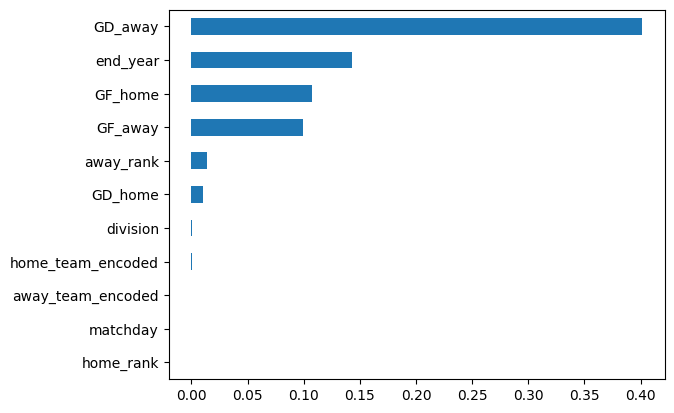

In [104]:
from sklearn.inspection import permutation_importance

imp = permutation_importance(linear_model_home, X_test, y_test, n_repeats=10, random_state=0)

imp.importances_mean, imp.importances_std

importances = pd.Series(imp.importances_mean, index=features)
importances.sort_values(ascending=True).plot(kind="barh")

In [105]:
from sklearn.ensemble import GradientBoostingRegressor

gbm_model_home = GradientBoostingRegressor()
gbm_model_home.fit(X_train, y_train)
gbm_y_pred = gbm_model_home.predict(X_test)

results_gb_home = X_test.copy()
results_gb_home["home_real"] = y_test
results_gb_home["home_pred"] = gbm_y_pred.astype(int)
results_gb_home

C:\Users\jorge\Documents\uab\ri\la-quiniela\ri_env\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,end_year,division,matchday,home_team_encoded,away_team_encoded,home_rank,away_rank,GD_home,GD_away,GF_home,GF_away,home_real,home_pred
46761,2019,2,20,77,2,2,4,24,16,52,54,1,1
23938,2017,1,3,114,68,6,8,6,-1,59,49,1,1
9194,1976,1,25,67,136,16,13,-11,-4,38,39,1,1
12364,1987,1,4,46,23,16,2,-21,34,38,63,1,0
5091,1960,1,29,144,116,9,11,4,-13,37,48,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38103,2000,2,30,131,122,9,11,6,-1,54,48,1,1
30022,1971,2,6,53,65,18,4,-10,12,38,44,0,1
46588,2019,2,4,90,41,3,16,20,-10,51,40,1,1
10833,1982,1,4,106,130,6,7,9,13,53,52,2,1


<Axes: >

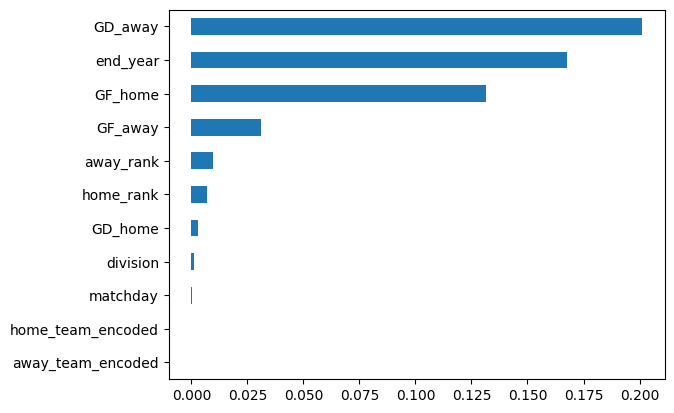

In [106]:
from sklearn.inspection import permutation_importance

imp = permutation_importance(gbm_model_home, X_test, y_test, n_repeats=10, random_state=0)

imp.importances_mean, imp.importances_std

importances = pd.Series(imp.importances_mean, index=features)
importances.sort_values(ascending=True).plot(kind="barh")

In [107]:
from sklearn.ensemble import RandomForestRegressor

# Create and train a Random Forest Regressor
rf_model_home = RandomForestRegressor()
rf_model_home.fit(X_train, y_train)

# Make predictions on the test data
rf_y_pred = rf_model_home.predict(X_test)

# Create a DataFrame for the "away" team with actual and predicted values
results_rf_home = X_test.copy()
results_rf_home["home_real"] = y_test
results_rf_home["home_pred"] = rf_y_pred.astype(int)

# Display the DataFrame
results_rf_home

C:\Users\jorge\Documents\uab\ri\la-quiniela\ri_env\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,end_year,division,matchday,home_team_encoded,away_team_encoded,home_rank,away_rank,GD_home,GD_away,GF_home,GF_away,home_real,home_pred
46761,2019,2,20,77,2,2,4,24,16,52,54,1,1
23938,2017,1,3,114,68,6,8,6,-1,59,49,1,1
9194,1976,1,25,67,136,16,13,-11,-4,38,39,1,1
12364,1987,1,4,46,23,16,2,-21,34,38,63,1,0
5091,1960,1,29,144,116,9,11,4,-13,37,48,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38103,2000,2,30,131,122,9,11,6,-1,54,48,1,1
30022,1971,2,6,53,65,18,4,-10,12,38,44,0,0
46588,2019,2,4,90,41,3,16,20,-10,51,40,1,2
10833,1982,1,4,106,130,6,7,9,13,53,52,2,1


<Axes: >

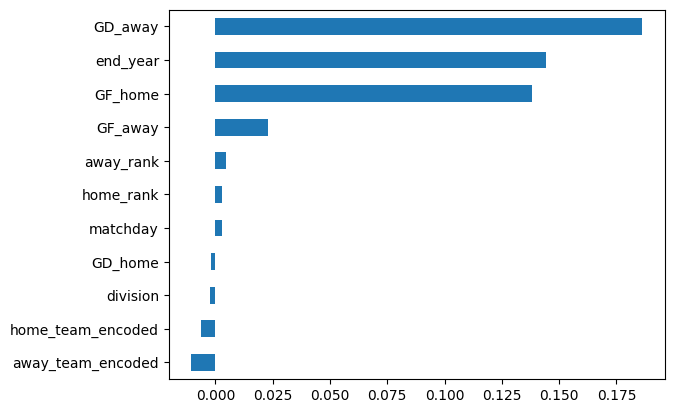

In [108]:
from sklearn.inspection import permutation_importance

imp = permutation_importance(rf_model_home, X_test, y_test, n_repeats=10, random_state=0)

imp.importances_mean, imp.importances_std

importances = pd.Series(imp.importances_mean, index=features)
importances.sort_values(ascending=True).plot(kind="barh")

In [122]:
target = ["score_visitor"]
features = ["end_year", "division", "matchday", "home_team_encoded", "away_team_encoded", "home_rank", "away_rank", "GD_home", "GD_away", "GF_home", "GF_away"]
X, y = main_df[features], main_df[target]

In [123]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (38350, 11)
X_test shape: (9588, 11)
y_train shape: (38350, 1)
y_test shape: (9588, 1)


In [124]:
from sklearn.linear_model import LinearRegression

linear_model_away = LinearRegression()
linear_model_away.fit(X_train, y_train)
linear_y_pred = linear_model_away.predict(X_test)

results_lm_away = X_test.copy()
results_lm_away["away_real"] = y_test
results_lm_away["away_pred"] = linear_y_pred.astype(int)
results_lm_away

,end_year,division,matchday,home_team_encoded,away_team_encoded,home_rank,away_rank,GD_home,GD_away,GF_home,GF_away,away_real,away_pred
46761,2019,2,20,77,2,2,4,24,16,52,54,1,0
23938,2017,1,3,114,68,6,8,6,-1,59,49,1,1
9194,1976,1,25,67,136,16,13,-11,-4,38,39,1,0
12364,1987,1,4,46,23,16,2,-21,34,38,63,1,1
5091,1960,1,29,144,116,9,11,4,-13,37,48,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38103,2000,2,30,131,122,9,11,6,-1,54,48,1,0
30022,1971,2,6,53,65,18,4,-10,12,38,44,1,1
46588,2019,2,4,90,41,3,16,20,-10,51,40,0,0
10833,1982,1,4,106,130,6,7,9,13,53,52,0,1


<Axes: >

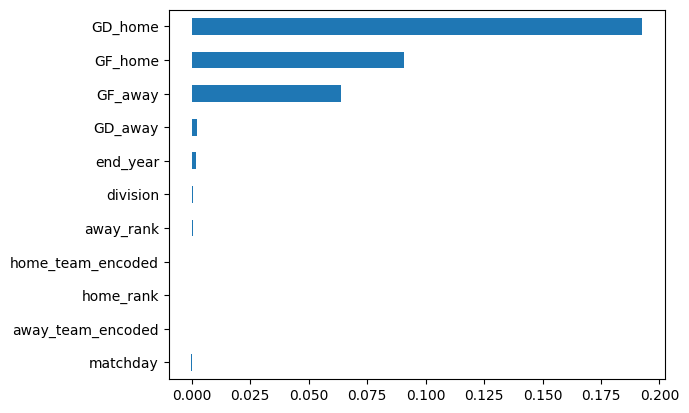

In [125]:
from sklearn.inspection import permutation_importance

imp = permutation_importance(linear_model_away, X_test, y_test, n_repeats=10, random_state=0)

imp.importances_mean, imp.importances_std

importances = pd.Series(imp.importances_mean, index=features)
importances.sort_values(ascending=True).plot(kind="barh")

In [126]:
from sklearn.ensemble import GradientBoostingRegressor

gbm_model_away = GradientBoostingRegressor()
gbm_model_away.fit(X_train, y_train)
gbm_y_pred = gbm_model_away.predict(X_test)

results_gb_away = X_test.copy()
results_gb_away["away_real"] = y_test
results_gb_away["away_pred"] = gbm_y_pred.astype(int)
results_gb_away

C:\Users\jorge\Documents\uab\ri\la-quiniela\ri_env\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,end_year,division,matchday,home_team_encoded,away_team_encoded,home_rank,away_rank,GD_home,GD_away,GF_home,GF_away,away_real,away_pred
46761,2019,2,20,77,2,2,4,24,16,52,54,1,0
23938,2017,1,3,114,68,6,8,6,-1,59,49,1,1
9194,1976,1,25,67,136,16,13,-11,-4,38,39,1,0
12364,1987,1,4,46,23,16,2,-21,34,38,63,1,1
5091,1960,1,29,144,116,9,11,4,-13,37,48,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38103,2000,2,30,131,122,9,11,6,-1,54,48,1,0
30022,1971,2,6,53,65,18,4,-10,12,38,44,1,0
46588,2019,2,4,90,41,3,16,20,-10,51,40,0,0
10833,1982,1,4,106,130,6,7,9,13,53,52,0,0


<Axes: >

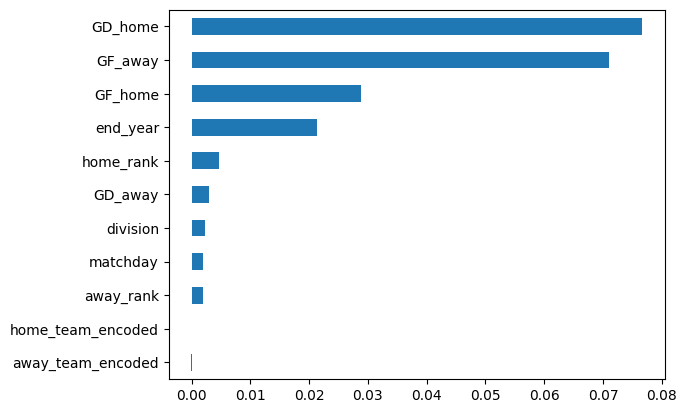

In [127]:
from sklearn.inspection import permutation_importance

imp = permutation_importance(gbm_model_away, X_test, y_test, n_repeats=10, random_state=0)

imp.importances_mean, imp.importances_std

importances = pd.Series(imp.importances_mean, index=features)
importances.sort_values(ascending=True).plot(kind="barh")

In [128]:
from sklearn.ensemble import RandomForestRegressor

# Create and train a Random Forest Regressor
rf_model_away = RandomForestRegressor()
rf_model_away.fit(X_train, y_train)

# Make predictions on the test data
rf_y_pred = rf_model_away.predict(X_test)

# Create a DataFrame for the "away" team with actual and predicted values
results_rf_away = X_test.copy()
results_rf_away["away_real"] = y_test
results_rf_away["away_pred"] = rf_y_pred.astype(int)

# Display the DataFrame
results_rf_away

C:\Users\jorge\Documents\uab\ri\la-quiniela\ri_env\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,end_year,division,matchday,home_team_encoded,away_team_encoded,home_rank,away_rank,GD_home,GD_away,GF_home,GF_away,away_real,away_pred
46761,2019,2,20,77,2,2,4,24,16,52,54,1,0
23938,2017,1,3,114,68,6,8,6,-1,59,49,1,1
9194,1976,1,25,67,136,16,13,-11,-4,38,39,1,0
12364,1987,1,4,46,23,16,2,-21,34,38,63,1,1
5091,1960,1,29,144,116,9,11,4,-13,37,48,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38103,2000,2,30,131,122,9,11,6,-1,54,48,1,0
30022,1971,2,6,53,65,18,4,-10,12,38,44,1,0
46588,2019,2,4,90,41,3,16,20,-10,51,40,0,0
10833,1982,1,4,106,130,6,7,9,13,53,52,0,1


<Axes: >

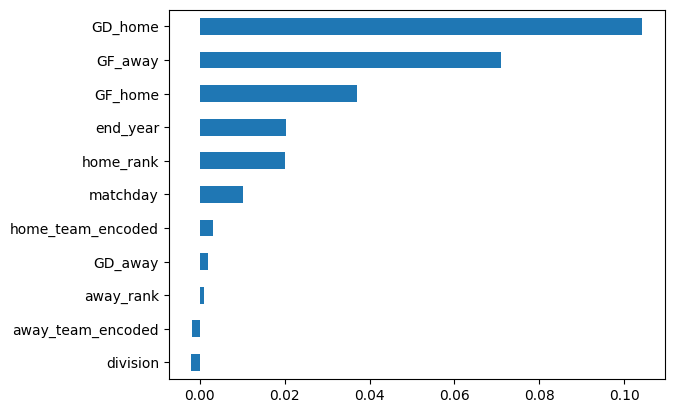

In [129]:
from sklearn.inspection import permutation_importance

imp = permutation_importance(rf_model_away, X_test, y_test, n_repeats=10, random_state=0)

imp.importances_mean, imp.importances_std

importances = pd.Series(imp.importances_mean, index=features)
importances.sort_values(ascending=True).plot(kind="barh")

In [130]:
columns_to_select1 = ['home_real', 'home_pred']
columns_to_select2 = ['away_real', 'away_pred']

# Create the results DataFrame by concatenating the selected columns
results_lm = pd.concat([results_lm_home[columns_to_select1], results_lm_away[columns_to_select2]], axis=1)
results_gb = pd.concat([results_gb_home[columns_to_select1], results_gb_away[columns_to_select2]], axis=1)
results_rf = pd.concat([results_rf_home[columns_to_select1], results_rf_away[columns_to_select2]], axis=1)

# Rename the columns if needed
results_lm.columns = ['home_real', 'home_pred', 'away_real', 'away_pred']
results_gb.columns = ['home_real', 'home_pred', 'away_real', 'away_pred']
results_rf.columns = ['home_real', 'home_pred', 'away_real', 'away_pred']

In [131]:
results_lm["result_real"] = results_lm.apply(lambda row: 0 if row["home_real"] > row["away_real"] else (2 if row["home_real"] < row["away_real"] else 1), axis=1)
results_gb["result_real"] = results_gb.apply(lambda row: 0 if row["home_real"] > row["away_real"] else (2 if row["home_real"] < row["away_real"] else 1), axis=1)
results_rf["result_real"] = results_rf.apply(lambda row: 0 if row["home_real"] > row["away_real"] else (2 if row["home_real"] < row["away_real"] else 1), axis=1)

results_lm["result_pred"] = results_lm.apply(lambda row: 0 if row["home_pred"] > row["away_pred"] else (2 if row["home_pred"] < row["away_pred"] else 1), axis=1)
results_gb["result_pred"] = results_gb.apply(lambda row: 0 if row["home_pred"] > row["away_pred"] else (2 if row["home_pred"] < row["away_pred"] else 1), axis=1)
results_rf["result_pred"] = results_rf.apply(lambda row: 0 if row["home_pred"] > row["away_pred"] else (2 if row["home_pred"] < row["away_pred"] else 1), axis=1)

In [132]:
from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score(results_lm['result_real'], results_lm['result_pred'])

test_accuracy

0.5078222778473092

In [133]:
test_accuracy = accuracy_score(results_gb['result_real'], results_gb['result_pred'])

test_accuracy

0.5062578222778473

In [134]:
test_accuracy = accuracy_score(results_rf['result_real'], results_rf['result_pred'])

test_accuracy

0.49457655402586564

In [192]:
target = ["score_home"]
features = ["end_year", "division", "matchday", "home_team_encoded", "away_team_encoded", "home_rank", "away_rank"]
X, y = main_df[features], main_df[target]

In [193]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (38350, 7)
X_test shape: (9588, 7)
y_train shape: (38350, 1)
y_test shape: (9588, 1)


In [194]:
from sklearn.ensemble import GradientBoostingRegressor

gbm_model_home = GradientBoostingRegressor()
gbm_model_home.fit(X_train, y_train)
gbm_y_pred = gbm_model_home.predict(X_test)

results_gb_home = X_test.copy()
results_gb_home["home_real"] = y_test
results_gb_home["home_pred"] = gbm_y_pred.astype(int)
results_gb_home

C:\Users\jorge\Documents\uab\ri\la-quiniela\ri_env\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,end_year,division,matchday,home_team_encoded,away_team_encoded,home_rank,away_rank,home_real,home_pred
46761,2019,2,20,77,2,2,4,1,1
23938,2017,1,3,114,68,6,8,1,1
9194,1976,1,25,67,136,16,13,1,1
12364,1987,1,4,46,23,16,2,1,0
5091,1960,1,29,144,116,9,11,1,2
...,...,...,...,...,...,...,...,...,...
38103,2000,2,30,131,122,9,11,1,1
30022,1971,2,6,53,65,18,4,0,1
46588,2019,2,4,90,41,3,16,1,1
10833,1982,1,4,106,130,6,7,2,1


<Axes: >

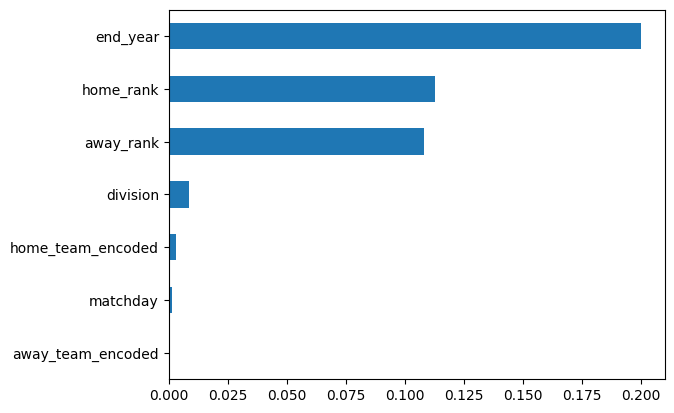

In [195]:
from sklearn.inspection import permutation_importance

imp = permutation_importance(gbm_model_home, X_test, y_test, n_repeats=10, random_state=0)

imp.importances_mean, imp.importances_std

importances = pd.Series(imp.importances_mean, index=features)
importances.sort_values(ascending=True).plot(kind="barh")

In [196]:
target = ["score_visitor"]
features = ["end_year", "division", "matchday", "home_team_encoded", "away_team_encoded", "home_rank", "away_rank"]
X, y = main_df[features], main_df[target]

In [197]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (38350, 7)
X_test shape: (9588, 7)
y_train shape: (38350, 1)
y_test shape: (9588, 1)


In [198]:
from sklearn.ensemble import GradientBoostingRegressor

gbm_model_away = GradientBoostingRegressor()
gbm_model_away.fit(X_train, y_train)
gbm_y_pred = gbm_model_away.predict(X_test)

results_gb_away = X_test.copy()
results_gb_away["away_real"] = y_test
results_gb_away["away_pred"] = gbm_y_pred.astype(int)
results_gb_away

C:\Users\jorge\Documents\uab\ri\la-quiniela\ri_env\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,end_year,division,matchday,home_team_encoded,away_team_encoded,home_rank,away_rank,away_real,away_pred
46761,2019,2,20,77,2,2,4,1,0
23938,2017,1,3,114,68,6,8,1,0
9194,1976,1,25,67,136,16,13,1,0
12364,1987,1,4,46,23,16,2,1,1
5091,1960,1,29,144,116,9,11,0,0
...,...,...,...,...,...,...,...,...,...
38103,2000,2,30,131,122,9,11,1,0
30022,1971,2,6,53,65,18,4,1,1
46588,2019,2,4,90,41,3,16,0,0
10833,1982,1,4,106,130,6,7,0,0


<Axes: >

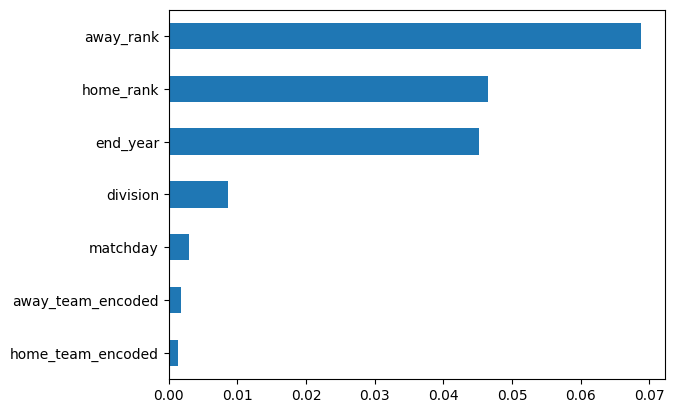

In [199]:
from sklearn.inspection import permutation_importance

imp = permutation_importance(gbm_model_away, X_test, y_test, n_repeats=10, random_state=0)

imp.importances_mean, imp.importances_std

importances = pd.Series(imp.importances_mean, index=features)
importances.sort_values(ascending=True).plot(kind="barh")

In [200]:
results_gb = pd.concat([results_gb_home[columns_to_select1], results_gb_away[columns_to_select2]], axis=1)
results_gb.columns = ['home_real', 'home_pred', 'away_real', 'away_pred']
results_gb["result_real"] = results_gb.apply(lambda row: 0 if row["home_real"] > row["away_real"] else (2 if row["home_real"] < row["away_real"] else 1), axis=1)
results_gb["result_pred"] = results_gb.apply(lambda row: 0 if row["home_pred"] > row["away_pred"] else (2 if row["home_pred"] < row["away_pred"] else 1), axis=1)

test_accuracy = accuracy_score(results_gb['result_real'], results_gb['result_pred'])

test_accuracy

0.5184605757196495

In [240]:
target = ["score_home"]
features = ["end_year", "GD_home", "GD_away", "GF_home", "GF_away"]
X, y = main_df[features], main_df[target]

In [241]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (38350, 5)
X_test shape: (9588, 5)
y_train shape: (38350, 1)
y_test shape: (9588, 1)


In [242]:
from sklearn.linear_model import LinearRegression

linear_model_home = LinearRegression()
linear_model_home.fit(X_train, y_train)

LinearRegression()

In [243]:
linear_y_pred = linear_model_home.predict(X_test)

results_lm_home = X_test.copy()
results_lm_home["home_real"] = y_test
results_lm_home["home_pred"] = linear_y_pred.astype(int)
results_lm_home

,end_year,GD_home,GD_away,GF_home,GF_away,home_real,home_pred
46761,2019,24,16,52,54,1,1
23938,2017,6,-1,59,49,1,1
9194,1976,-11,-4,38,39,1,1
12364,1987,-21,34,38,63,1,0
5091,1960,4,-13,37,48,1,2
...,...,...,...,...,...,...,...
38103,2000,6,-1,54,48,1,1
30022,1971,-10,12,38,44,0,1
46588,2019,20,-10,51,40,1,1
10833,1982,9,13,53,52,2,1


In [244]:
target = ["score_visitor"]
features = ["end_year", "GD_home", "GD_away", "GF_home", "GF_away"]
X, y = main_df[features], main_df[target]

In [245]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (38350, 5)
X_test shape: (9588, 5)
y_train shape: (38350, 1)
y_test shape: (9588, 1)


In [246]:
from sklearn.linear_model import LinearRegression

linear_model_away = LinearRegression()
linear_model_away.fit(X_train, y_train)

LinearRegression()

In [247]:
linear_y_pred = linear_model_away.predict(X_test)

results_lm_away = X_test.copy()
results_lm_away["away_real"] = y_test
results_lm_away["away_pred"] = linear_y_pred.astype(int)
results_lm_away

,end_year,GD_home,GD_away,GF_home,GF_away,away_real,away_pred
46761,2019,24,16,52,54,1,0
23938,2017,6,-1,59,49,1,1
9194,1976,-11,-4,38,39,1,0
12364,1987,-21,34,38,63,1,1
5091,1960,4,-13,37,48,0,0
...,...,...,...,...,...,...,...
38103,2000,6,-1,54,48,1,0
30022,1971,-10,12,38,44,1,1
46588,2019,20,-10,51,40,0,0
10833,1982,9,13,53,52,0,1


In [248]:
results_lm = pd.concat([results_lm_home[columns_to_select1], results_lm_away[columns_to_select2]], axis=1)
results_lm.columns = ['home_real', 'home_pred', 'away_real', 'away_pred']
results_lm["result_real"] = results_lm.apply(lambda row: 0 if row["home_real"] > row["away_real"] else (2 if row["home_real"] < row["away_real"] else 1), axis=1)
results_lm["result_pred"] = results_lm.apply(lambda row: 0 if row["home_pred"] > row["away_pred"] else (2 if row["home_pred"] < row["away_pred"] else 1), axis=1)

test_accuracy = accuracy_score(results_lm['result_real'], results_lm['result_pred'])

test_accuracy

0.5110554860241969

In [275]:
target = ["score_home"]
features = ["end_year", "division", "matchday", "home_rank", "away_rank", "GD_home", "GD_away", "GF_home", "GF_away"]
X, y = main_df[features], main_df[target]

In [276]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (38350, 9)
X_test shape: (9588, 9)
y_train shape: (38350, 1)
y_test shape: (9588, 1)


In [277]:
from sklearn.ensemble import RandomForestRegressor

# Create and train a Random Forest Regressor
rf_model_home = RandomForestRegressor()
rf_model_home.fit(X_train, y_train)

# Make predictions on the test data
rf_y_pred = rf_model_home.predict(X_test)

# Create a DataFrame for the "away" team with actual and predicted values
results_rf_home = X_test.copy()
results_rf_home["home_real"] = y_test
results_rf_home["home_pred"] = rf_y_pred.astype(int)

# Display the DataFrame
results_rf_home

C:\Users\jorge\Documents\uab\ri\la-quiniela\ri_env\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,end_year,division,matchday,home_rank,away_rank,GD_home,GD_away,GF_home,GF_away,home_real,home_pred
46761,2019,2,20,2,4,24,16,52,54,1,1
23938,2017,1,3,6,8,6,-1,59,49,1,1
9194,1976,1,25,16,13,-11,-4,38,39,1,1
12364,1987,1,4,16,2,-21,34,38,63,1,0
5091,1960,1,29,9,11,4,-13,37,48,1,2
...,...,...,...,...,...,...,...,...,...,...,...
38103,2000,2,30,9,11,6,-1,54,48,1,1
30022,1971,2,6,18,4,-10,12,38,44,0,1
46588,2019,2,4,3,16,20,-10,51,40,1,1
10833,1982,1,4,6,7,9,13,53,52,2,1


In [278]:
target = ["score_visitor"]
features = ["end_year", "division", "matchday", "home_rank", "away_rank", "GD_home", "GD_away", "GF_home", "GF_away"]
X, y = main_df[features], main_df[target]

In [279]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (38350, 9)
X_test shape: (9588, 9)
y_train shape: (38350, 1)
y_test shape: (9588, 1)


In [280]:
from sklearn.ensemble import RandomForestRegressor

# Create and train a Random Forest Regressor
rf_model_away = RandomForestRegressor()
rf_model_away.fit(X_train, y_train)

# Make predictions on the test data
rf_y_pred = rf_model_away.predict(X_test)

# Create a DataFrame for the "away" team with actual and predicted values
results_rf_away = X_test.copy()
results_rf_away["away_real"] = y_test
results_rf_away["away_pred"] = rf_y_pred.astype(int)

# Display the DataFrame
results_rf_away

C:\Users\jorge\Documents\uab\ri\la-quiniela\ri_env\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,end_year,division,matchday,home_rank,away_rank,GD_home,GD_away,GF_home,GF_away,away_real,away_pred
46761,2019,2,20,2,4,24,16,52,54,1,0
23938,2017,1,3,6,8,6,-1,59,49,1,1
9194,1976,1,25,16,13,-11,-4,38,39,1,0
12364,1987,1,4,16,2,-21,34,38,63,1,1
5091,1960,1,29,9,11,4,-13,37,48,0,0
...,...,...,...,...,...,...,...,...,...,...,...
38103,2000,2,30,9,11,6,-1,54,48,1,0
30022,1971,2,6,18,4,-10,12,38,44,1,0
46588,2019,2,4,3,16,20,-10,51,40,0,0
10833,1982,1,4,6,7,9,13,53,52,0,1


In [281]:
results_rf = pd.concat([results_rf_home[columns_to_select1], results_rf_away[columns_to_select2]], axis=1)
results_rf.columns = ['home_real', 'home_pred', 'away_real', 'away_pred']
results_rf["result_real"] = results_rf.apply(lambda row: 0 if row["home_real"] > row["away_real"] else (2 if row["home_real"] < row["away_real"] else 1), axis=1)
results_rf["result_pred"] = results_rf.apply(lambda row: 0 if row["home_pred"] > row["away_pred"] else (2 if row["home_pred"] < row["away_pred"] else 1), axis=1)

test_accuracy = accuracy_score(results_rf['result_real'], results_rf['result_pred'])

test_accuracy

0.4971839799749687